In [1]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import os
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, Input
import matplotlib.pyplot as plt
import time

In [2]:
np.random.seed(10)
noise_dim = 100
batch_size = 32
steps_per_epoch = 375
epochs = 10
save_path = 'fcgan-CIRs'
img_cols, img_rows, channels = 53, 1, 1
optimizer = Adam(0.0002, 0.5)


In [3]:
import pandas as pd
df = pd.read_csv("dataset_new.csv", header=None) 
X = df.iloc[:,0:53].to_numpy()
np.random.seed(seed=int(time.time()))
n_examples = X.shape[0]
n_train = n_examples * 0.7
train_idx = np.random.choice(range(0,n_examples), size=int(n_train), replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
x_train = X[train_idx]
x_test = X[test_idx]



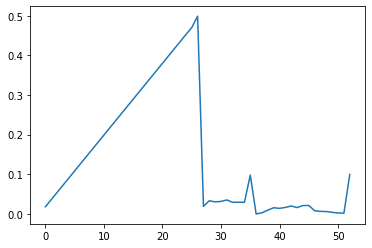

In [5]:
plt.plot(x_train[2])

In [6]:
def create_generator():
    generator = Sequential()
    generator.add(Dense(256, input_dim=noise_dim))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(img_rows*img_cols*channels, activation='tanh'))
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(1024, input_dim=img_rows*img_cols*channels))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dense(1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator


In [7]:
discriminator = create_discriminator()
generator = create_generator()

In [8]:
discriminator.trainable = False
gan_input = Input(shape=(noise_dim,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)


In [52]:
for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        fake_x = generator.predict(noise)
        real_x = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
        x = np.concatenate((real_x, fake_x))
        disc_y = np.zeros(2*batch_size)
        disc_y[:batch_size] = 0.9
#         discriminator.trainable = True
        d_loss = discriminator.train_on_batch(x, disc_y)
#         discriminator.trainable = False
        y_gen = np.ones(batch_size)
        g_loss = gan.train_on_batch(noise, y_gen)
    print(f'Epoch: {epoch} \t Discriminator Loss: {d_loss} \t\t Generator Loss: {g_loss}')


Epoch: 0 	 Discriminator Loss: 0.4355781674385071 		 Generator Loss: 1.8936429023742676
Epoch: 1 	 Discriminator Loss: 0.3687385320663452 		 Generator Loss: 2.3310065269470215
Epoch: 2 	 Discriminator Loss: 0.336434930562973 		 Generator Loss: 2.5694963932037354
Epoch: 3 	 Discriminator Loss: 0.2556922733783722 		 Generator Loss: 2.820265054702759
Epoch: 4 	 Discriminator Loss: 0.22320574522018433 		 Generator Loss: 3.4497880935668945
Epoch: 5 	 Discriminator Loss: 0.29383352398872375 		 Generator Loss: 3.132909059524536
Epoch: 6 	 Discriminator Loss: 0.29834336042404175 		 Generator Loss: 2.9687161445617676
Epoch: 7 	 Discriminator Loss: 0.26016366481781006 		 Generator Loss: 3.760676383972168
Epoch: 8 	 Discriminator Loss: 0.2996644377708435 		 Generator Loss: 2.854367971420288
Epoch: 9 	 Discriminator Loss: 0.31237173080444336 		 Generator Loss: 3.56942081451416


In [55]:
def dream_cirs(noise):
    generated_images = generator.predict(noise)
    #print(generated_images.shape)
    plt.figure(figsize=(20, 10))
    
    for i, image in enumerate(generated_images):
        plt.subplot(10, 10, i+1)
        if channels == 1:
            plt.plot(image)
        else:
            plt.imshow(image.reshape((img_rows, img_cols, channels)))
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


In [12]:
noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
fake_x = generator.predict(noise)
real_x = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

In [14]:
x = np.concatenate((real_x, fake_x))
disc_y = np.zeros(2*batch_size)

In [17]:
disc_y.shape

(64,)

In [56]:
generated_images = generator.predict(noise)


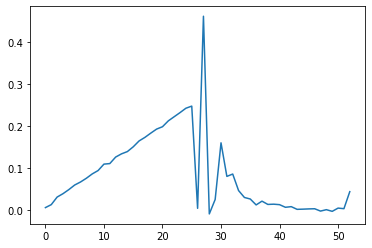

In [57]:
plt.plot(generated_images[1])

ValueError: num must be 1 <= num <= 100, not 101

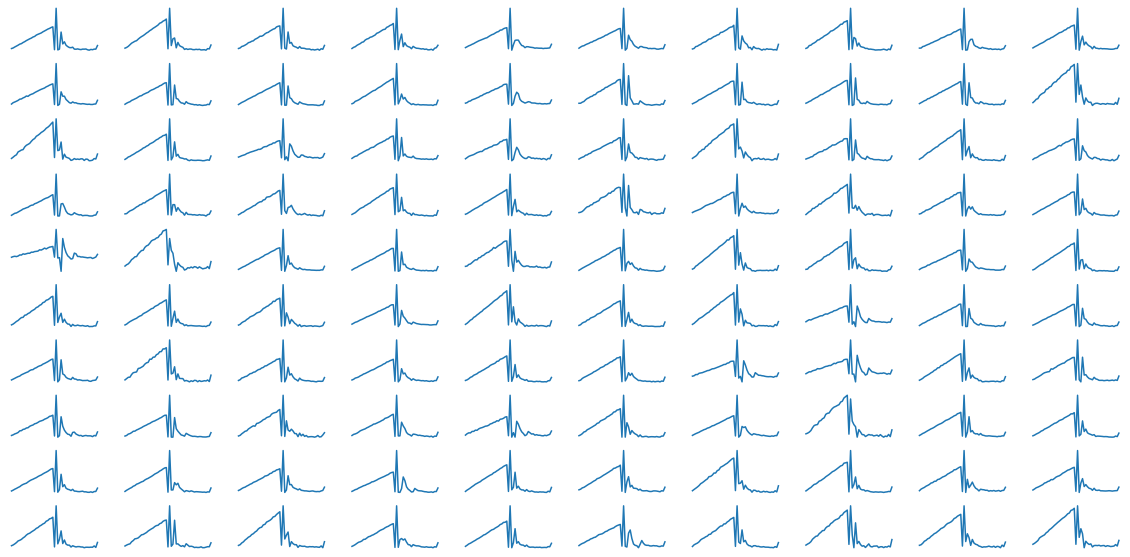

In [58]:
noise = np.random.normal(0, 1, size=(100, noise_dim))
dream_cirs(noise)


In [32]:
generated_images = generator.predict(noise)

In [33]:
gan.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_7 (Sequential)    (None, 53)                737077    
_________________________________________________________________
sequential_6 (Sequential)    (None, 1)                 711681    
Total params: 1,448,758
Trainable params: 737,077
Non-trainable params: 711,681
_________________________________________________________________
